In [1]:
!pip install spotipy


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Part1

In [2]:
import requests
import base64
import pandas as pd
import re
from bs4 import BeautifulSoup

In [3]:
# spotify API credentials
CLIENT_ID = '093b8f84914048b6968760b0f6718a34'
CLIENT_SECRET = '9280a6d635464a7fac8701ea5adebf19'
TOKEN_URL = 'https://accounts.spotify.com/api/token'

def get_access_token():
    # encode client credentials
    auth_str = f"{CLIENT_ID}:{CLIENT_SECRET}"
    b64_auth_str = base64.b64encode(auth_str.encode()).decode()

    # set headers and data for POST request
    headers = {
        "Authorization": f"Basic {b64_auth_str}"
    }
    data = {
        "grant_type": "client_credentials"
    }

    # request access token
    response = requests.post(TOKEN_URL, headers=headers, data=data)
    response_data = response.json()

    # return the access token
    return response_data['access_token']

# get access token
access_token = get_access_token()
print("Access Token:", access_token)


Access Token: BQDEMfC-xCdS592VkXv3Om3-gN5T8Ydys6CSLZcUAaF-p74SGV1rgQLkHuhefgHiviEeGXn2DEfvJ-mzcxqtvTtAgEj3Bm14pxsi3n8CHckF5l8HiwQ


In [4]:
def get_multiple_albums(album_ids, access_token):
    '''function getting multiple albums from spotify'''
    url = "https://api.spotify.com/v1/albums" # based URL
    params = {"ids": ",".join(album_ids)} # parameter/ filter by album ids
    headers = {"Authorization": f"Bearer {access_token}"} # specify access token
    response = requests.get(url, headers=headers, params=params) # request

    # check status
    if response.status_code == 200:
        return response.json()["albums"] # get data if success
    else:
        print(f"Error: {response.status_code}")
        return None

def get_track_audio_features(track_id, access_token):
    '''function getting track audio feature from spotify'''
    url = f"https://api.spotify.com/v1/audio-features/{track_id}" # based URL
    headers = {"Authorization": f"Bearer {access_token}"} # specify access token
    response = requests.get(url, headers=headers) # request

    # check status
    if response.status_code == 200:
        return response.json() # get data if success
    else:
        print(f"Error: {response.status_code}")
        return None

In [5]:
# define a list of album IDs to retrieve
album_ids = [
    "2fYhqwDWXjbpjaIJPEfKFw",  # thank you, next
    "3tx8gQqWbGwqIGZHqDNrGe",  # Sweetener
    "3euz4vS7ezKGnNSwgyvKcd",  # Positions
    "5EYKrEDnKhhcNxGedaRQeK",  # eternal sunshine
    "5wJD60fqranwuUGvOGSiyt"   # Christmas & Chill
]

# check album details [for exploring details]
albums = get_multiple_albums(album_ids, access_token)
albums

[{'album_type': 'album',
  'total_tracks': 12,
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
   'KW',
   'EG',
   'MA',
   'DZ',
   'TN',
   'LB',
   'JO',
   'PS',
   'IN',
   'KZ',
   'MD',
   'UA',
   'AL',
   'BA',
   'HR',
   'ME',
   'MK',
   'RS',
   'SI',
   'KR',
   'BD',
   'PK',
   'LK',
   'GH',
   'KE',
   'NG',
   'TZ',
   'UG',
   'AG',
   'AM',
   'BS',
   'BB',
   'BZ',
   'B

In [6]:
# check track details [for exploring details]
track = '39LmTF9RgyakzSYX8txrow'
audio = get_track_audio_features(track, access_token)
audio

{'danceability': 0.729,
 'energy': 0.476,
 'key': 8,
 'loudness': -4.985,
 'mode': 1,
 'speechiness': 0.0363,
 'acousticness': 0.378,
 'instrumentalness': 0,
 'liveness': 0.12,
 'valence': 0.368,
 'tempo': 62.519,
 'type': 'audio_features',
 'id': '39LmTF9RgyakzSYX8txrow',
 'uri': 'spotify:track:39LmTF9RgyakzSYX8txrow',
 'track_href': 'https://api.spotify.com/v1/tracks/39LmTF9RgyakzSYX8txrow',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/39LmTF9RgyakzSYX8txrow',
 'duration_ms': 212267,
 'time_signature': 3}

In [7]:
data = []

# loop through each album to gather track details
for album in albums:
    album_name = album["name"]
    
    # for each track in the album, retrieve audio features
    for track in album["tracks"]["items"]:
        track_name = track["name"]
        track_id = track["id"]
        
        # get audio features for each track
        audio_features = get_track_audio_features(track_id, access_token)
        
        if audio_features:
            data.append({
                "Album": album_name,
                "Song Name": track_name,
                "Danceability": audio_features["danceability"],
                "Energy": audio_features["energy"],
                "Key": audio_features["key"],
                "Loudness": audio_features["loudness"],
                "Mode": audio_features["mode"],
                "Speechiness": audio_features["speechiness"],
                "Acousticness": audio_features["acousticness"],
                "Instrumentalness": audio_features["instrumentalness"],
                "Liveness": audio_features["liveness"],
                "Valence": audio_features["valence"],
                "Tempo": audio_features["tempo"],
                "Duration_ms": audio_features["duration_ms"]
            })

# create DataFrame
df = pd.DataFrame(data)

# display the DataFrame
df

,Album,Song Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,"thank u, next",imagine,0.729,0.476,8,-4.985,1,0.0363,0.3780,0.000000,0.1200,0.368,62.519,212267
1,"thank u, next",needy,0.647,0.309,7,-7.948,0,0.0367,0.7780,0.000007,0.2020,0.195,87.046,171573
2,"thank u, next",NASA,0.747,0.459,6,-6.891,1,0.3060,0.4480,0.000000,0.2520,0.470,75.021,182000
3,"thank u, next",bloodline,0.757,0.665,2,-5.194,0,0.0774,0.0815,0.000158,0.2160,0.643,151.979,216893
4,"thank u, next",fake smile,0.450,0.619,9,-7.412,1,0.3730,0.3290,0.000000,0.3190,0.427,83.221,208880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Christmas & Chill,December,0.477,0.419,11,-11.071,0,0.1830,0.4840,0.000000,0.2060,0.606,88.975,116261
57,Christmas & Chill,Not Just On Christmas,0.211,0.253,9,-7.797,1,0.0307,0.2230,0.000007,0.1530,0.319,64.123,122747
58,Christmas & Chill,True Love,0.353,0.370,5,-7.344,0,0.0512,0.0757,0.000001,0.0997,0.241,75.694,166237
59,Christmas & Chill,Winter Things,0.537,0.227,0,-10.050,1,0.0742,0.9180,0.000000,0.2430,0.811,71.799,158663


# Part2

In [8]:
# access token from genius
access_token2 = "3sjE8WCtP40Vs_3bmI9cnX1-Q4XqN97GuSAFKrq2Zc403C_UIgUX33sI9yEvsBEM"
headers = {"Authorization": f"Bearer {access_token2}"}

In [9]:
# example for searching songs [for exploring details]
base_url = "https://api.genius.com"
search_url = f"{base_url}/search"
song_title = "Thank u, next"  # example song to search for
params = {"q": song_title}

# request
response = requests.get(search_url, headers=headers, params=params)

# check status
if response.status_code == 200:
    data2 = response.json()
    print(data2)
else:
    print(f"Error: {response.status_code} - {response.text}")


{'meta': {'status': 200}, 'response': {'hits': [{'highlights': [], 'index': 'song', 'type': 'song', 'result': {'annotation_count': 9, 'api_path': '/songs/4063065', 'artist_names': 'Ariana Grande', 'full_title': 'thank u, next by\xa0Ariana\xa0Grande', 'header_image_thumbnail_url': 'https://images.genius.com/1d81685b7522775f4ca8c6b6e71df062.300x300x1.png', 'header_image_url': 'https://images.genius.com/1d81685b7522775f4ca8c6b6e71df062.1000x1000x1.png', 'id': 4063065, 'lyrics_owner_id': 104344, 'lyrics_state': 'complete', 'path': '/Ariana-grande-thank-u-next-lyrics', 'primary_artist_names': 'Ariana Grande', 'pyongs_count': 513, 'relationships_index_url': 'https://genius.com/Ariana-grande-thank-u-next-sample', 'release_date_components': {'year': 2018, 'month': 11, 'day': 3}, 'release_date_for_display': 'November 3, 2018', 'release_date_with_abbreviated_month_for_display': 'Nov. 3, 2018', 'song_art_image_thumbnail_url': 'https://images.genius.com/1d81685b7522775f4ca8c6b6e71df062.300x300x1.p

In [10]:
# check keys to retrieve data
data2.keys()

dict_keys(['meta', 'response'])

In [12]:
# check response key
data2['response']

{'hits': [{'highlights': [],
   'index': 'song',
   'type': 'song',
   'result': {'annotation_count': 9,
    'api_path': '/songs/4063065',
    'artist_names': 'Ariana Grande',
    'full_title': 'thank u, next by\xa0Ariana\xa0Grande',
    'header_image_thumbnail_url': 'https://images.genius.com/1d81685b7522775f4ca8c6b6e71df062.300x300x1.png',
    'header_image_url': 'https://images.genius.com/1d81685b7522775f4ca8c6b6e71df062.1000x1000x1.png',
    'id': 4063065,
    'lyrics_owner_id': 104344,
    'lyrics_state': 'complete',
    'path': '/Ariana-grande-thank-u-next-lyrics',
    'primary_artist_names': 'Ariana Grande',
    'pyongs_count': 513,
    'relationships_index_url': 'https://genius.com/Ariana-grande-thank-u-next-sample',
    'release_date_components': {'year': 2018, 'month': 11, 'day': 3},
    'release_date_for_display': 'November 3, 2018',
    'release_date_with_abbreviated_month_for_display': 'Nov. 3, 2018',
    'song_art_image_thumbnail_url': 'https://images.genius.com/1d81685b7

In [13]:
def get_song_info(artist, song_name):
    '''function retrieving song details from specified artist using genius api'''
    query = f"{artist} {song_name}"
    params = {"q": query}
    response = requests.get(search_url, headers=headers, params=params)

    # check status
    if response.status_code == 200:
        response_data = response.json().get('response', {})
        hits = response_data.get('hits', [])
        if hits:
            return hits[0].get('result')
    return None

def get_album_info(song_id):
    '''function retrieving album using song id'''
    song_details_url = f"{base_url}/songs/{song_id}"
    response = requests.get(song_details_url, headers=headers)
    
    # check status
    if response.status_code == 200:
        song_data = response.json().get('response', {}).get('song', {})
        album_info = song_data.get('album', {}).get('name', 'N/A') if song_data.get('album') else 'N/A'
        return album_info
    return 'N/A'

def get_lyrics_url(song_id):
    '''function retrieving lyrics URL using song id'''
    song_details_url = f"{base_url}/songs/{song_id}"
    response = requests.get(song_details_url, headers=headers)
    
    # check status
    if response.status_code == 200:
        song_data = response.json().get('response', {}).get('song', {})
        return song_data.get('url', 'N/A')
    return 'N/A'

def get_lyrics_from_url(lyrics_url):
    '''function retrieving lyrics from lyrics URL'''
    lyrics_response = requests.get(lyrics_url)
    
    # check status
    if lyrics_response.status_code == 200:
        # use BeautifulSoup to extract lyrics
        soup = BeautifulSoup(lyrics_response.text, "html.parser") 
        lyrics = ""
        for div in soup.find_all("div", class_=lambda x: x and "Lyrics__Container" in x):
            lyrics += div.get_text(separator="\n")
        return lyrics.strip()
    return "Lyrics not available"

In [14]:
base_url = "https://api.genius.com"
search_url = f"{base_url}/search"

# Lists to store results
song_titles = []
albums = []
lyrics = []

# loop through each song in df (result from spotify)
artist = "Ariana Grande"  # Specify the artist
for song_name in df['Song Name']:
    song_info = get_song_info(artist, song_name)
    
    if song_info:
        # add the song title to list
        song_titles.append(song_info.get('title', 'N/A'))
        
        # get song ID for further details
        song_id = song_info.get('id')
        if song_id:
            # add album to list
            albums.append(get_album_info(song_id))
            
            # get lyrics URL
            lyrics_url = get_lyrics_url(song_id)

            #add scraped lyrics to list
            lyrics.append(get_lyrics_from_url(lyrics_url))
        else: #if not exist add as 'N/A'
            albums.append("N/A")
            lyrics.append("N/A")
    else: #if not exist add as 'N/A'
        song_titles.append("N/A")
        albums.append("N/A")
        lyrics.append("N/A")

# create new DataFrame
result_df = pd.DataFrame({
    "Song Name": df['Song Name'],
    "Title": song_titles,
    "Album": albums,
    "Lyrics": lyrics
})

# display the DataFrame
result_df

,Song Name,Title,Album,Lyrics
0,imagine,imagine,"thank u, next (Japanese Import)","[Verse 1]\nStep up, the two of us, nobody know..."
1,needy,needy,"thank u, next (Japanese Import)",[Verse 1]\nIf you take too long to hit me back...
2,NASA,NASA,"thank u, next (Japanese Import)",[Intro: Shangela Laquifa Wadley]\nThis is one ...
3,bloodline,bloodline,"thank u, next (Japanese Import)",[Intro: Marjorie Grande]\nBecause I'm trying t...
4,fake smile,fake smile,"thank u, next (Japanese Import)",[Intro: Wendy Rene]\nAfter laughter comes tear...
...,...,...,...,...
56,December,December,Christmas & Chill (Japan Version),"[Verse 1]\nWhen December comes, I bet you want..."
57,Not Just On Christmas,Not Just On Christmas,Christmas & Chill (Japan Version),"[Chorus]\nI'll love you 'til I die, boy\nEvery..."
58,True Love,True Love,Christmas & Chill (Japan Version),[Verse 1]\nOn that first day of Christmas\nWhe...
59,Winter Things,Winter Things,Christmas & Chill (Japan Version),"[Verse 1]\nIt ain't even cold outside, not whe..."


In [15]:
# replace text in parentheses with an empty string [for albums]
result_df['Album'] = result_df['Album'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

result_df

,Song Name,Title,Album,Lyrics
0,imagine,imagine,"thank u, next","[Verse 1]\nStep up, the two of us, nobody know..."
1,needy,needy,"thank u, next",[Verse 1]\nIf you take too long to hit me back...
2,NASA,NASA,"thank u, next",[Intro: Shangela Laquifa Wadley]\nThis is one ...
3,bloodline,bloodline,"thank u, next",[Intro: Marjorie Grande]\nBecause I'm trying t...
4,fake smile,fake smile,"thank u, next",[Intro: Wendy Rene]\nAfter laughter comes tear...
...,...,...,...,...
56,December,December,Christmas & Chill,"[Verse 1]\nWhen December comes, I bet you want..."
57,Not Just On Christmas,Not Just On Christmas,Christmas & Chill,"[Chorus]\nI'll love you 'til I die, boy\nEvery..."
58,True Love,True Love,Christmas & Chill,[Verse 1]\nOn that first day of Christmas\nWhe...
59,Winter Things,Winter Things,Christmas & Chill,"[Verse 1]\nIt ain't even cold outside, not whe..."


In [16]:
# identify mismatch between Song Name (from spotify api) and Title (from genius api)
mismatches = result_df[result_df['Song Name'] != result_df['Title']]

mismatches

,Song Name,Title,Album,Lyrics
11,"break up with your girlfriend, i'm bored","break up with your girlfriend, i’m bored","thank u, next",[Verse 1]\nYou got me some type of way (Hmm)\n...
13,blazed (feat. Pharrell Williams),Ariana Grande - Blazed ft. Pharrell Williams (...,Ariana Grande - Sweetener *,[פזמון: פארל ויליאמס & \nאריאנה גרנדה\n]\nיש מ...
14,the light is coming (feat. Nicki Minaj),The motherfucking future Playlist,N/A,August 2019 Update\nCharli XCX - Warm (feat. H...
15,R.E.M,​R.E.M.,Sweetener,[Intro: Ariana Grande]\nMm-mm\n[Verse 1: Arian...
16,God is a woman,​God is a woman,Sweetener,"[Chorus]\nYou, you love it how I move you\nYou..."
17,sweetener,​sweetener,Sweetener,[Pre-Chorus: Ariana Grande & \nPharrell\n]\nWh...
20,breathin,​breathin,Sweetener,[Intro]\n​​lacigam gnihtemos od oT\n​​thgin la...
21,no tears left to cry,​no tears left to cry,Sweetener,"[Intro]\nRight now, I'm in a state of mind\nI ..."
22,borderline (feat. Missy Elliott),Ariana Grande - borderline ft. Missy Elliott (...,Ariana Grande - Sweetener,"[Letra de ""Ariana Grande - borderline ft. Miss..."
23,better off,​better off,Sweetener,"[Verse 1]\nYou keep me in your orbit\nWell, I ..."


In [17]:
# check DataFrame from spotify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Album             61 non-null     object 
 1   Song Name         61 non-null     object 
 2   Danceability      61 non-null     float64
 3   Energy            61 non-null     float64
 4   Key               61 non-null     int64  
 5   Loudness          61 non-null     float64
 6   Mode              61 non-null     int64  
 7   Speechiness       61 non-null     float64
 8   Acousticness      61 non-null     float64
 9   Instrumentalness  61 non-null     float64
 10  Liveness          61 non-null     float64
 11  Valence           61 non-null     float64
 12  Tempo             61 non-null     float64
 13  Duration_ms       61 non-null     int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 6.8+ KB


In [18]:
# check DataFrame from genius
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Song Name  61 non-null     object
 1   Title      61 non-null     object
 2   Album      61 non-null     object
 3   Lyrics     61 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


In [19]:
# replace everything before the hyphen (and the hyphen itself) with an empty string
result_df['Title'] = result_df['Title'].str.replace(r'^.*? - ', '', regex=True)
result_df['Album'] = result_df['Album'].str.replace(r'^.*? - ', '', regex=True)

# clean up whitespace and remove non-breaking spaces or other invisible characters
result_df['Title'] = result_df['Title'].str.strip().replace({'\u200b': '', '\xa0': ''}, regex=True)

# replace curly single quotes with straight single quotes
result_df['Title'] = result_df['Title'].str.replace("’", "'", regex=False)

# remove the asterisk in Album
result_df['Album'] = df['Album'].str.replace(r'\*', '', regex=True).str.strip()

In [20]:
mismatches = result_df[result_df['Song Name'] != result_df['Title']]

mismatches

,Song Name,Title,Album,Lyrics
13,blazed (feat. Pharrell Williams),Blazed ft. Pharrell Williams (תרגום לעברית),Sweetener,[פזמון: פארל ויליאמס & \nאריאנה גרנדה\n]\nיש מ...
14,the light is coming (feat. Nicki Minaj),The motherfucking future Playlist,Sweetener,August 2019 Update\nCharli XCX - Warm (feat. H...
15,R.E.M,R.E.M.,Sweetener,[Intro: Ariana Grande]\nMm-mm\n[Verse 1: Arian...
22,borderline (feat. Missy Elliott),borderline ft. Missy Elliott (Traducción al Es...,Sweetener,"[Letra de ""Ariana Grande - borderline ft. Miss..."
29,motive (with Doja Cat),New Music Friday 10/30/20,Positions,34+35 - Ariana Grande\nNever Change (feat. Fut...
31,off the table (with The Weeknd),New Music Friday 10/30/20,Positions,34+35 - Ariana Grande\nNever Change (feat. Fut...
33,safety net (feat. Ty Dolla $ign),safety net ft. Ty Dolla $ign (Traducción al Es...,Positions,"[Letra de ""Ariana Grande - safety net ft. Ty D..."
53,ordinary things (feat. Nonna),ordinary things (Nonna részvételével) [magyar ...,eternal sunshine,Hmm\nFelbonthatjuk az összes pezsgőt Kaliforni...
54,Intro,intro (end of the world),Christmas & Chill,[Intro]\nUh\n[Verse]\nHow can I tell if I'm in...
60,Santa Tell Me - Naughty Version,Santa Tell Me (Naughty Version),Christmas & Chill,"[Chorus]\nSanta, tell me if you're really ther..."


In [21]:
# drop rows that have wrong information
result_df = result_df.drop([13, 14, 29, 31])

In [22]:
# check the mismatch again
mismatches = result_df[result_df['Song Name'] != result_df['Title']]

mismatches

,Song Name,Title,Album,Lyrics
15,R.E.M,R.E.M.,Sweetener,[Intro: Ariana Grande]\nMm-mm\n[Verse 1: Arian...
22,borderline (feat. Missy Elliott),borderline ft. Missy Elliott (Traducción al Es...,Sweetener,"[Letra de ""Ariana Grande - borderline ft. Miss..."
33,safety net (feat. Ty Dolla $ign),safety net ft. Ty Dolla $ign (Traducción al Es...,Positions,"[Letra de ""Ariana Grande - safety net ft. Ty D..."
53,ordinary things (feat. Nonna),ordinary things (Nonna részvételével) [magyar ...,eternal sunshine,Hmm\nFelbonthatjuk az összes pezsgőt Kaliforni...
54,Intro,intro (end of the world),Christmas & Chill,[Intro]\nUh\n[Verse]\nHow can I tell if I'm in...
60,Santa Tell Me - Naughty Version,Santa Tell Me (Naughty Version),Christmas & Chill,"[Chorus]\nSanta, tell me if you're really ther..."


In [23]:
# replace values in 'Title' with values from 'Song Name' where they are not equal
result_df.loc[result_df['Title'] != result_df['Song Name'], 'Title'] = result_df['Song Name']

In [24]:
# check if there's still mismatch
mismatches = result_df[result_df['Song Name'] != result_df['Title']]

mismatches

,Song Name,Title,Album,Lyrics


In [25]:
# drop 'Song Name' column
result_df.drop('Song Name', axis=1, inplace=True)

# rename the 'Title' column to 'Song Name'
result_df.rename(columns={'Title': 'Song Name'}, inplace=True)

# Part3

In [26]:
# merge the DataFrames on 'Album' and 'Song Name' using an inner join
merged_df = pd.merge(df, result_df, on=['Album', 'Song Name'], how='inner')

In [27]:
merged_df

,Album,Song Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Lyrics
0,"thank u, next",imagine,0.729,0.476,8,-4.985,1,0.0363,0.378000,0.000000,0.1200,0.3680,62.519,212267,"[Verse 1]\nStep up, the two of us, nobody know..."
1,"thank u, next",needy,0.647,0.309,7,-7.948,0,0.0367,0.778000,0.000007,0.2020,0.1950,87.046,171573,[Verse 1]\nIf you take too long to hit me back...
2,"thank u, next",NASA,0.747,0.459,6,-6.891,1,0.3060,0.448000,0.000000,0.2520,0.4700,75.021,182000,[Intro: Shangela Laquifa Wadley]\nThis is one ...
3,"thank u, next",bloodline,0.757,0.665,2,-5.194,0,0.0774,0.081500,0.000158,0.2160,0.6430,151.979,216893,[Intro: Marjorie Grande]\nBecause I'm trying t...
4,"thank u, next",fake smile,0.450,0.619,9,-7.412,1,0.3730,0.329000,0.000000,0.3190,0.4270,83.221,208880,[Intro: Wendy Rene]\nAfter laughter comes tear...
5,"thank u, next",bad idea,0.847,0.579,1,-5.314,1,0.0720,0.026800,0.054600,0.1020,0.5690,137.998,267107,[Verse 1]\nI've been outta sight\nI've been wo...
6,"thank u, next",make up,0.710,0.715,7,-5.371,1,0.1920,0.084500,0.000001,0.0617,0.4790,105.044,140693,[Verse 1]\nI like to fuck with you just to mak...
7,"thank u, next",ghostin,0.290,0.364,9,-8.295,1,0.0293,0.418000,0.000019,0.1850,0.1100,103.684,271467,[Verse 1]\nI know you hear me when I cry\nI tr...
8,"thank u, next",in my head,0.662,0.600,0,-6.403,1,0.0704,0.173000,0.000137,0.1090,0.3310,134.972,222947,[Intro: Doug Middlebrook]\nHere's the thing: y...
9,"thank u, next",7 rings,0.777,0.317,1,-10.732,0,0.3080,0.591000,0.000000,0.0881,0.3300,139.848,178627,"[Verse 1]\nYeah, breakfast at Tiffany's and bo..."


In [28]:
# export the result to a CSV file
merged_df.to_csv('merged_df.csv', index=False)

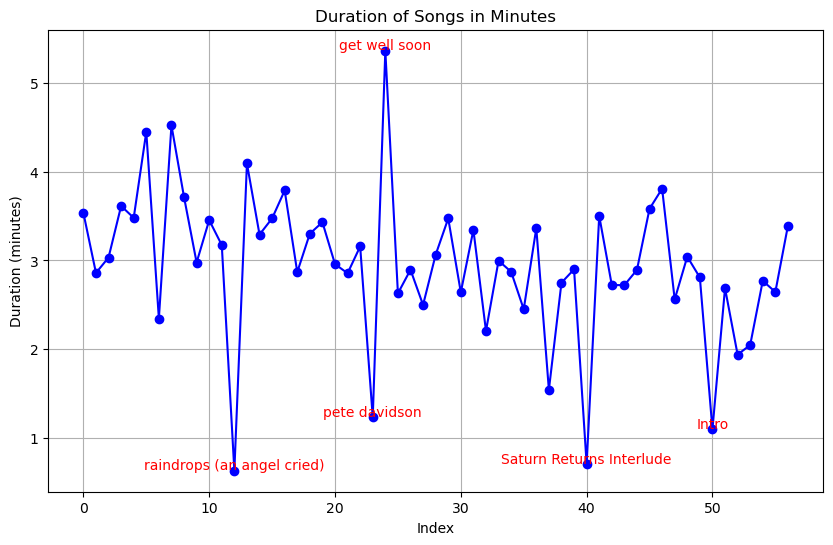

In [29]:
import matplotlib.pyplot as plt

# convert milliseconds to minutes
merged_df['Duration_min'] = merged_df['Duration_ms'] / 60000  # 60000 ms = 1 minute

# calculate IQR to detect outliers
Q1 = merged_df['Duration_min'].quantile(0.25)
Q3 = merged_df['Duration_min'].quantile(0.75)
IQR = Q3 - Q1

# define outliers: values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identify the outliers
outliers = merged_df[(merged_df['Duration_min'] < lower_bound) | (merged_df['Duration_min'] > upper_bound)]

# create the plot
plt.figure(figsize=(10, 6))

# plot the line graph for Duration in minutes
plt.plot(merged_df['Duration_min'], marker='o', color='b')

# label only the outlier songs
for i, song_name in outliers.iterrows():
    plt.text(i, song_name['Duration_min'] + 0.01, song_name['Song Name'], ha='center', fontsize=10, color='red')

# add title and labels
plt.title('Duration of Songs in Minutes')
plt.xlabel('Index')
plt.ylabel('Duration (minutes)')
plt.grid(True)

# show the plot
plt.show()

From the plot, we can see that most songs are about 2-4 minutes long, but there are some songs that are less than 2 minutes or longer than 5 minutes which are listed in the graph.

In [40]:
from collections import Counter

# List of love-related keywords
love_keywords = ['love', 'heart', 'baby', 'babe', 'kiss', 'together', 'my love', 'forever']

def is_love_song(lyrics, keywords, threshold=2):
    '''function checking if the song is a love song'''
    # preprocess the lyrics: convert to lowercase and remove non-alphabetical characters
    lyrics_clean = re.sub(r'[^a-zA-Z\s]', '', lyrics.lower())
    words = lyrics_clean.split()
    
    # count occurrences of love-related keywords
    word_counts = Counter(words)
    
    # count how many of the love keywords appear in the lyrics
    love_count = sum(word_counts[key] for key in keywords)
    
    # classify as love song if the count of love-related words exceeds the threshold
    return love_count >= threshold

# apply the function to check each song
merged_df['Is_Love_Song'] = merged_df['Lyrics'].apply(lambda lyrics: is_love_song(lyrics, love_keywords))

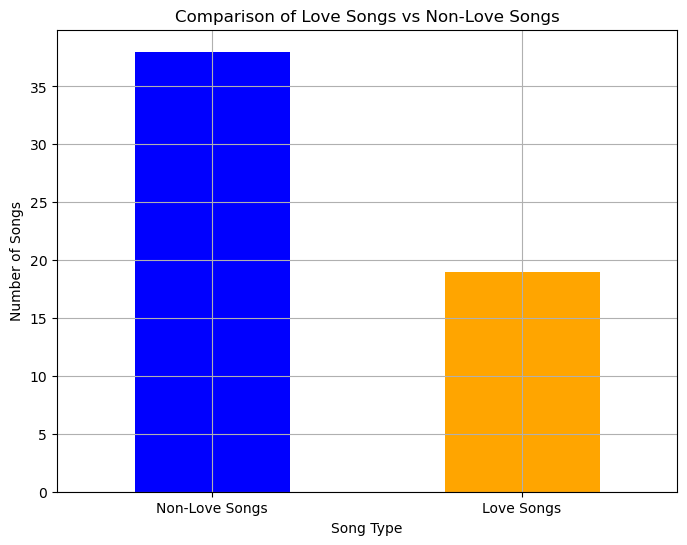

In [41]:
# plot histogram comparing the number of love songs vs non-love songs
plt.figure(figsize=(8, 6))
merged_df['Is_Love_Song'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparison of Love Songs vs Non-Love Songs')
plt.xlabel('Song Type')
plt.ylabel('Number of Songs')
plt.xticks(ticks=[0, 1], labels=['Non-Love Songs', 'Love Songs'], rotation=0)
plt.grid(True)
plt.show()

From the graph, we can see that the number of love songs by the singer is less than the number of non-love songs.